In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

from env import user, host, password
import acquire
import summarize
import prepare

np.random.seed(5)

iris = acquire.get_iris_data()

In [2]:
iris.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.10,3.50,1.40,0.20,1
1,setosa,2,4.90,3.00,1.40,0.20,1
2,setosa,3,4.70,3.20,1.30,0.20,1
3,setosa,4,4.60,3.10,1.50,0.20,1
4,setosa,5,5.00,3.60,1.40,0.20,1


In [3]:
X = iris.drop(['species_id', 'species_name'], axis=1)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[125.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471],
       [ 25.        ,   5.00612245,   3.43061224,   1.46326531,
          0.24693878],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ]])

In [6]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

,measurement_id,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,,
0,125.00,6.57,2.97,5.52,2.01
1,25.00,5.01,3.43,1.46,0.25
2,74.50,5.92,2.78,4.21,1.30


Text(0.5, 1.0, 'Petal Length and Width By Cluster')

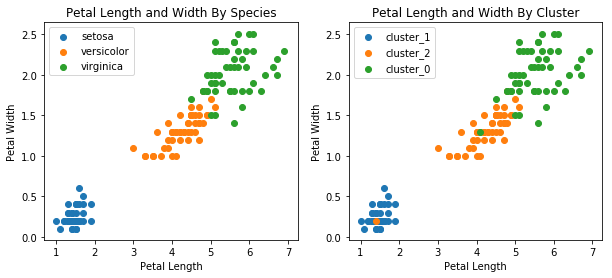

In [7]:
iris['cluster'] = kmeans.predict(X)

iris.cluster = 'cluster_' + iris.cluster.astype('str')

plt.figure(figsize=(10, 4))

plt.subplot(121)

for v in iris.species_name.unique():
    df = iris[iris.species_name == v]
    plt.scatter(df.petal_length, df.petal_width, label=v)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length and Width By Species')

plt.subplot(122)

for v in iris.cluster.unique():
    df = iris[iris.cluster == v]
    plt.scatter(df.petal_length, df.petal_width, label=v)

plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length and Width By Cluster')

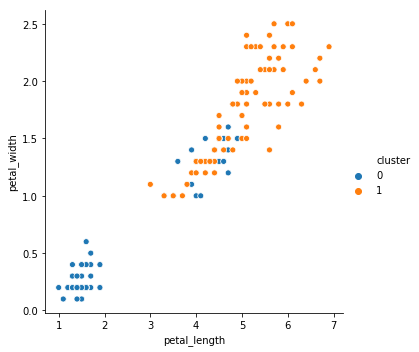

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

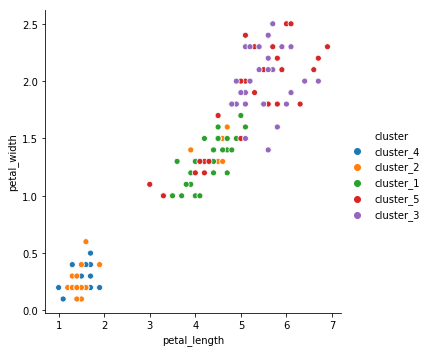

In [9]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

Another Example

In [10]:
estimators = [('8 Clusters', KMeans(n_clusters=8)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('3 Clusters, bad hyperparam', KMeans(n_clusters=3, n_init=1, max_iter=1, init='random'))]

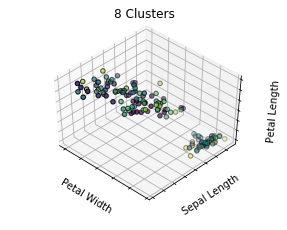

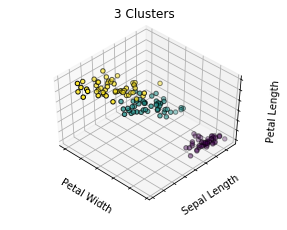

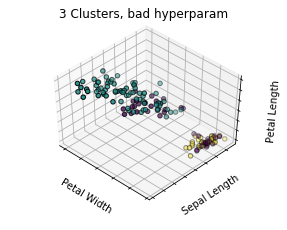

In [11]:
for i, (title, kmeans) in enumerate(estimators):
    # fit the model
    kmeans.fit(X)

    labels = kmeans.labels_

    # setup the 3d plot
    fignum = i + 1
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # plot the points
    ax.scatter(X.petal_width, X.sepal_length, X.petal_length,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Length')
    ax.set_zlabel('Petal Length')

    ax.set_title(title)
    ax.dist = 12

In [12]:
iris.head()

,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,cluster
0,setosa,1,5.10,3.50,1.40,0.20,1,cluster_4
1,setosa,2,4.90,3.00,1.40,0.20,1,cluster_4
2,setosa,3,4.70,3.20,1.30,0.20,1,cluster_4
3,setosa,4,4.60,3.10,1.50,0.20,1,cluster_4
4,setosa,5,5.00,3.60,1.40,0.20,1,cluster_4


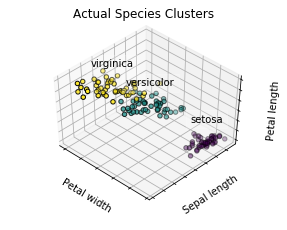

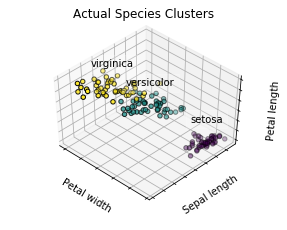

In [13]:
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# add species names
for species in iris.species_name.unique():
    df = iris[iris.species_name == species]
    x = df.petal_width.mean()
    y = df.sepal_length.mean()
    z = df.petal_length.mean() + 2

    ax.text3D(x, y, z, species,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# add the actual data points
ax.scatter(X.petal_width, X.sepal_length, X.petal_length, c=iris.species_id, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Actual Species Clusters')
ax.dist = 12

fig